1) the majority vote approach produces a value of .4, as .2 and .6 are both equally the most commonly observed value, and the avererage of the two values = .4. The average probability produces a value of .39, which indicates that the two apporaches, at least in the context of this data are very similar. Which outlines, that in general, these two appoaches are attempting to do ultimatley the same thing

1) The elegance of OOB in comparision to the more traditional hold out set approach is that it provides with much better predictive fits, as one can evaluate the hold out test accutracy of all models as they are being generated, because it can take advantage og data that is normally just discarded in ordeer to evaluate accuracy of each resample model fit

In [116]:
# function to install the packages 
import_packages <- function(packages) {
  for (package in packages) {
    if (!(package %in% row.names(installed.packages()))) { 
      install.packages(package, repos = "http://cran.us.r-project.org") 
    } 
    library(package, character.only = TRUE) 
  }
}

import_packages(c('tidyverse'))
import_packages(c('tree'))
import_packages(c('randomForest'))
import_packages(c('ISLR'))
setwd("~/Desktop/Grad_School/Classes/Spring_2019/Classes/Data_Science/DataSciencePsychNeuro_CMU85732/Homeworks/hcp_data/")
d<-read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")



# -------------------------------
# Question 3
# -------------------------------

library(tidyverse)
library(tree)
library(randomForest)
library(ISLR)

# (a)
d %>%
  select( Gender, Age, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol, 
         WM_Task_Acc, ReadEng_Unadj, Language_Task_Acc,
         Dexterity_Unadj, PosAffect_Unadj)  %>%
  na.omit() -> d1


Regression tree:
tree(formula = Flanker_Unadj ~ ., data = d1, subset = train)
Variables actually used in tree construction:
[1] "WM_Task_Acc"       "Dexterity_Unadj"   "ReadEng_Unadj"    
[4] "FS_Total_GM_Vol"   "PosAffect_Unadj"   "FS_Tot_WM_Vol"    
[7] "Language_Task_Acc"
Number of terminal nodes:  14 
Residual mean deviance:  78.89 = 40230 / 510 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-26.5800  -5.9000   0.2067   0.0000   5.6870  24.3200 

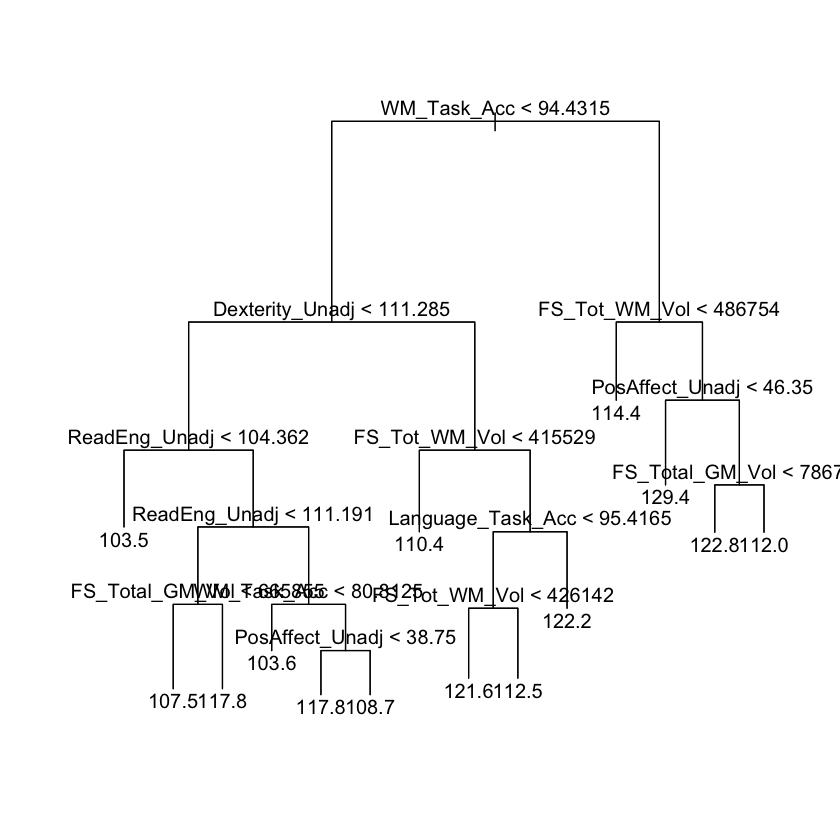

$size
 [1] 14 13 12 11 10  9  6  4  3  2  1

$dev
 [1] 58690.52 58122.03 58004.39 58489.41 54619.87 54661.52 54645.38 54645.38
 [9] 54645.38 54583.61 55034.80

$k
 [1]      -Inf  545.6248  571.4125  585.5182  865.0674  945.9197  983.5261
 [8] 1007.3465 1009.1203 1585.5792 2483.2146

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

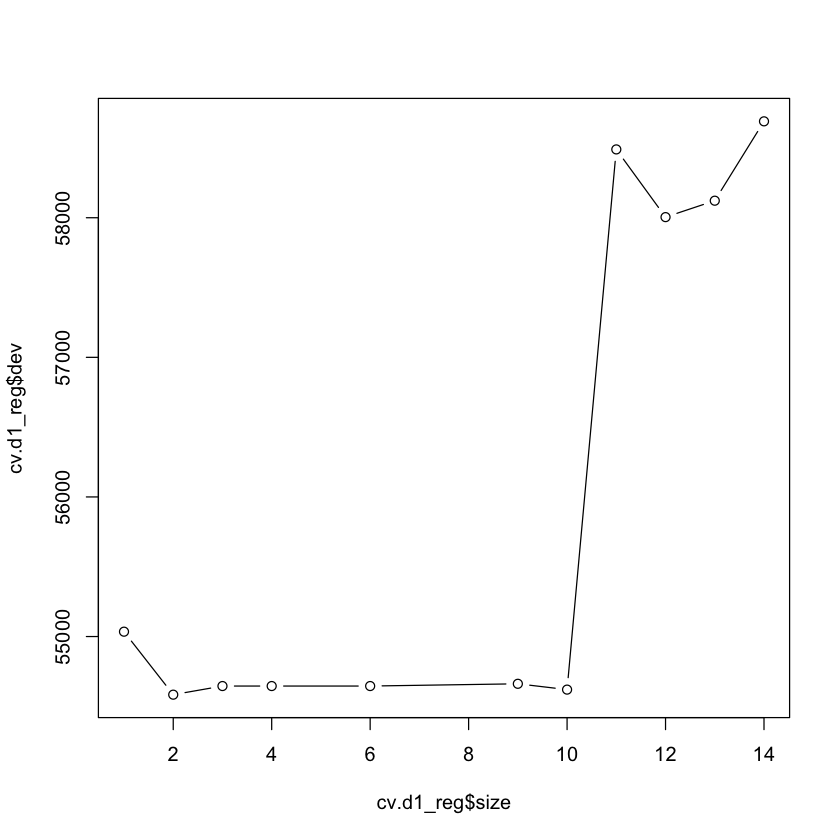

[1] 115.7794

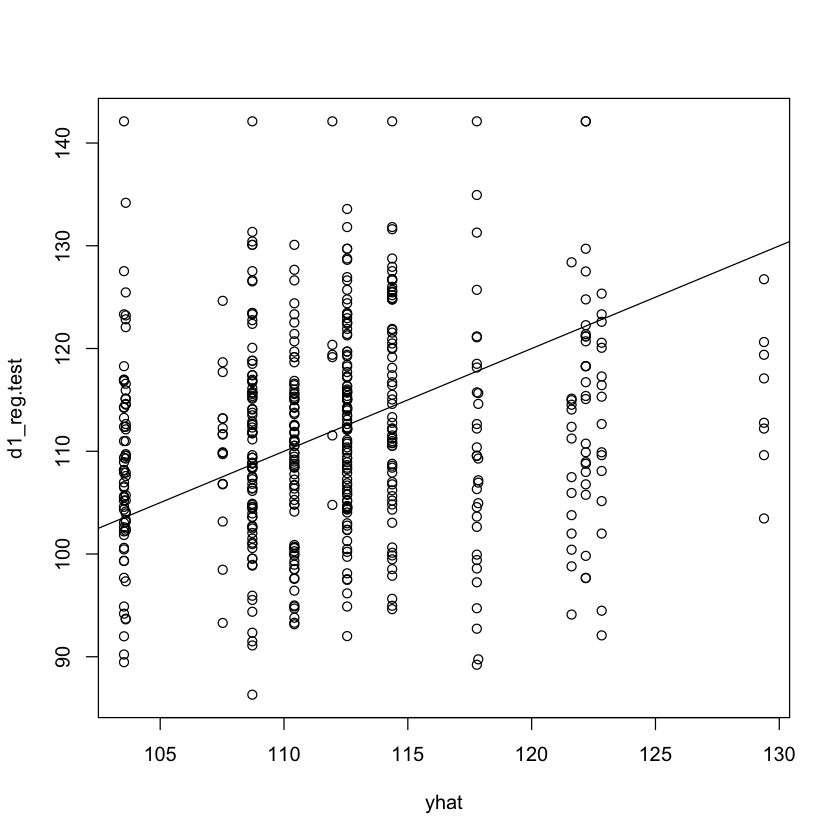

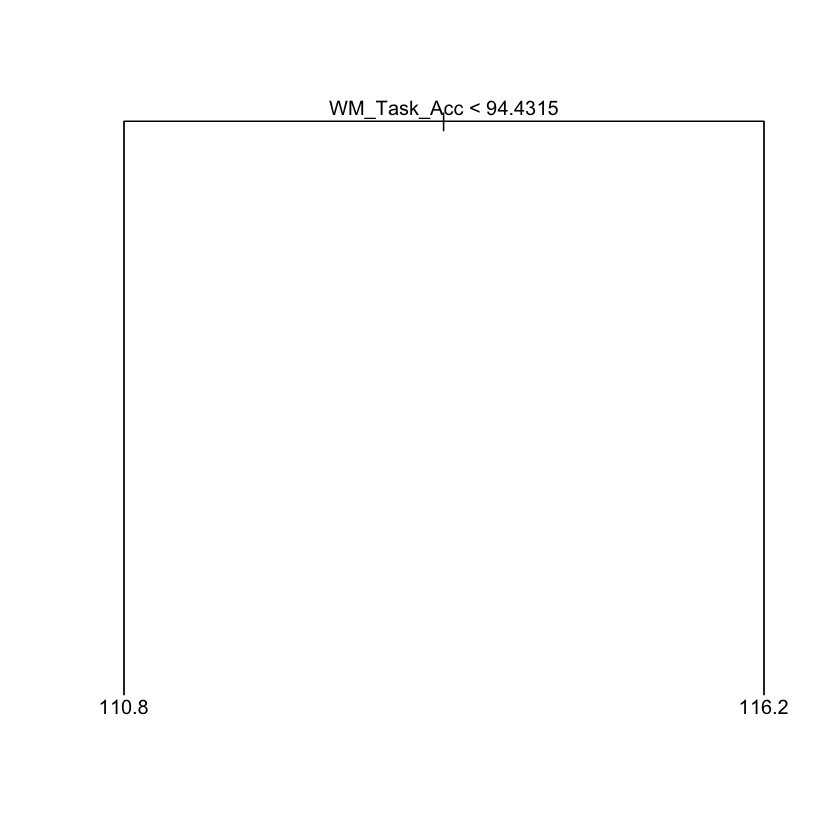

In [117]:
# (b)

train = sample(1: nrow(d1), nrow(d1)/2) #create the training set
tree.d1_reg=tree(Flanker_Unadj~.,d1, subset=train) #fit the regression tree
summary(tree.d1_reg)
plot(tree.d1_reg)
text(tree.d1_reg, pretty=0)

#first, let's look at the CV error as a function tree size
cv.d1_reg=cv.tree(tree.d1_reg) 
plot(cv.d1_reg$size, cv.d1_reg$dev,type='b') # plot says the best is 2
cv.d1_reg # the summary says best is 9

yhat=predict(tree.d1_reg,newdata=d1[-train ,])
d1_reg.test=d1[-train, "Flanker_Unadj"]
plot(yhat ,d1_reg.test)
abline(0,1)
mean((yhat-d1_reg.test)^2)


prune.d1_reg=prune.tree(tree.d1_reg,best=2) #manually selecting a 2-node tree
plot(prune.d1_reg)
text(prune.d1_reg,pretty=0)


Classification tree:
tree(formula = Gender ~ ., data = d1)
Variables actually used in tree construction:
[1] "FS_Total_GM_Vol" "Dexterity_Unadj"
Number of terminal nodes:  7 
Residual mean deviance:  0.7767 = 809.3 / 1042 
Misclassification error rate: 0.1783 = 187 / 1049 

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 1049 1449.00 F ( 0.534795 0.465205 )  
   2) FS_Total_GM_Vol < 700219 607  609.10 F ( 0.799012 0.200988 )  
     4) FS_Total_GM_Vol < 640836 256   71.20 F ( 0.968750 0.031250 )  
       8) Dexterity_Unadj < 99.215 24   26.99 F ( 0.750000 0.250000 ) *
       9) Dexterity_Unadj > 99.215 232   23.00 F ( 0.991379 0.008621 ) *
     5) FS_Total_GM_Vol > 640836 351  442.60 F ( 0.675214 0.324786 )  
      10) Dexterity_Unadj < 112.375 153  211.80 F ( 0.522876 0.477124 )  
        20) Dexterity_Unadj < 92.855 11    0.00 M ( 0.000000 1.000000 ) *
        21) Dexterity_Unadj > 92.855 142  194.60 F ( 0.563380 0.436620 ) *
      11) Dexterity_Unadj > 112.375 198  202.00 F ( 0.792929 0.207071 ) *
   3) FS_Total_GM_Vol > 700219 442  405.70 M ( 0.171946 0.828054 )  
     6) FS_Total_GM_Vol < 737694 201  245.10 M ( 0.298507 0.701493 ) *
     7) FS_Total_GM_Vol > 737694 241  117.70 M ( 0.066390 0.933610 ) *

[1] 949
[1] 949


             Gender.test
d1_class.pred  F  M
            F 40 14
            M 13 33

[1] 0.78

[1] "size"   "dev"    "k"      "method"

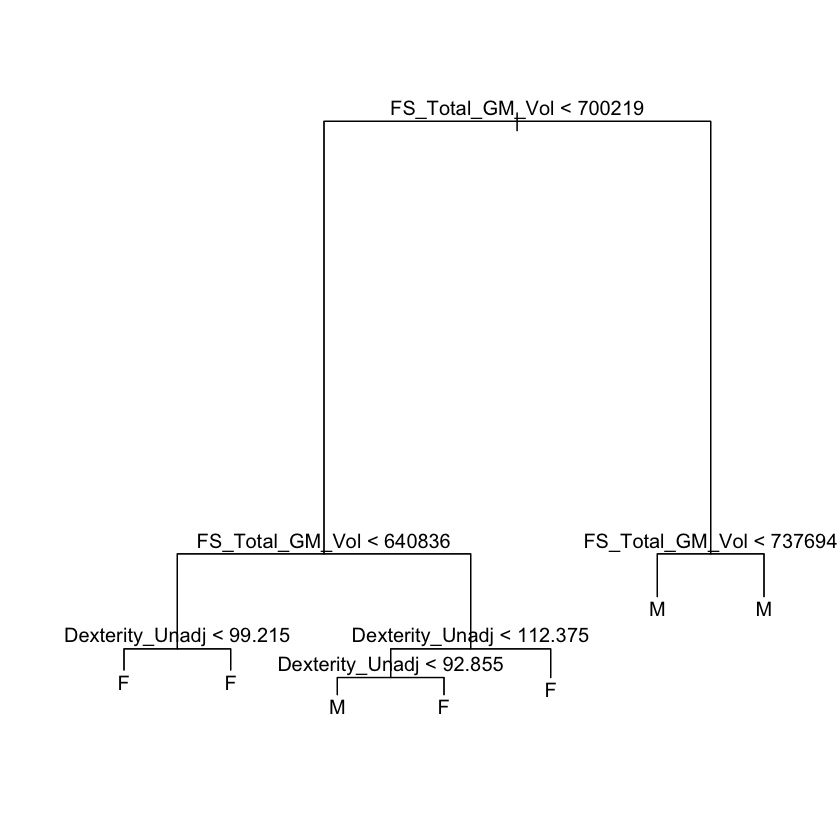

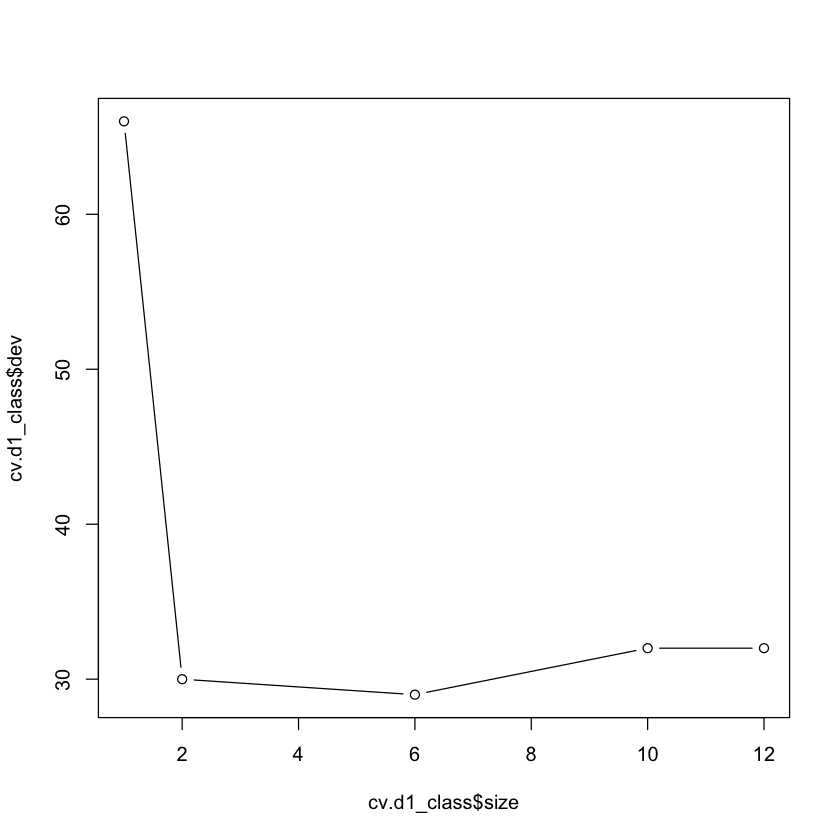

         Gender.test
tree.pred  F  M
        F 42 15
        M 11 32

[1] 0.73

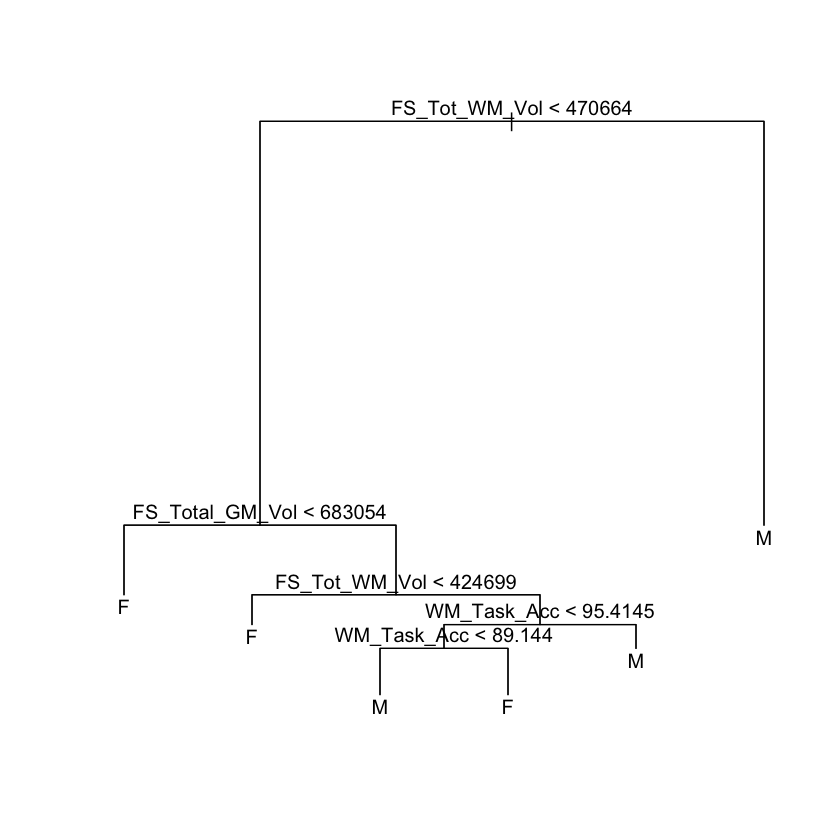

In [118]:

# -------------------------------
# Question 4
# -------------------------------


tree.d1_class <- tree(Gender~., d1)
summary(tree.d1_class)

plot(tree.d1_class) #this will create the basic tree structure
text(tree.d1_class, pretty=0)
tree.d1_class

set.seed (8)
idx = 1:nrow(d1)
test=sample(idx, 100) #sample 100 for the test set
tune = sample(idx[-test], 150) #150 for the tuning set
train = idx[!(idx %in% c(tune, test))] ##select indices that are not in tune

d1_class.tune=d1[tune,] #indices for test set
d1_class.test=d1[test,]
d1_class.train=d1[train,] 

Gender.test=d1$Gender[test] #get test data

print(length(c(tune,train)))
d1_class.carseats=tree(Gender~., d1, subset=tune) #tuned model
d1_class.pred=predict(tree.d1_class, d1_class.test, type="class") #make a prediction using the test set

print(length(c(tune,train)))
tree.d1_class=tree(Gender~., d1, subset=tune) #tuned model
d1_class.pred=predict(tree.d1_class, d1_class.test, type="class")
table(d1_class.pred, Gender.test) 
total_accuracy= (43+ 35)/length(test)
total_accuracy

#Pruning
set.seed(3)
cv.d1_class = cv.tree(tree.d1_class, FUN=prune.misclass) 
names(cv.d1_class)
plot(cv.d1_class$size ,cv.d1_class$dev ,type="b") # 6 nodes is the best


prune.d1_class=prune.misclass(tree.d1_class,best=6) #tuned model
plot(prune.d1_class) #plotting the newly pruned tree
text(prune.d1_class, pretty=0)

tree.pred=predict(prune.d1_class, d1_class.test, type="class")
table(tree.pred, Gender.test)

total_pruned_accuracy = (40+33)/length(test) #tuned model test
total_pruned_accuracy







In [124]:
# -------------------------------
# Question 5
# -------------------------------


library(randomForest)
set.seed(1)
rf.d1=randomForest(Gender~.,data=d1, subset=train, mtry=3,
                       importance=TRUE)
rf.d1
importance(rf.d1)
rftest_accuracy = (354+294)/length(train)
rftest_accuracy


Call:
 randomForest(formula = Gender ~ ., data = d1, mtry = 3, importance = TRUE,      subset = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 18.9%
Confusion matrix:
    F   M class.error
F 354  70   0.1650943
M  81 294   0.2160000

,F,M,MeanDecreaseAccuracy,MeanDecreaseGini
Age,8.532399956,11.018513,13.6639076,13.93989
Flanker_Unadj,-0.901328740,2.909352,1.4979123,25.33673
FS_Tot_WM_Vol,18.160620058,19.128000,26.4791080,78.16739
FS_Total_GM_Vol,47.806022715,49.248173,66.9807534,146.95563
WM_Task_Acc,1.484633406,5.661093,5.2539973,25.53361
ReadEng_Unadj,2.414431677,6.405730,6.3774695,25.88078
Language_Task_Acc,0.686605676,3.839561,3.4476389,21.49410
Dexterity_Unadj,15.509303901,11.178267,18.6681642,39.82971
PosAffect_Unadj,-0.003874682,-1.242468,-0.8786791,20.21738


[1] 0.8110138

In [122]:
length(train)

[1] 799